# Environment setup

In [ ]:
# Install necessary libraries
# !pip install -q openai langchain langchain-openai langchain-community openai-whisper sentence-transformers pdf2image
# !apt-get install poppler-utils
# !pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 45.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.5/443.5 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/ztm/rag_ztm/CAPSTONE PROJECT - MultiModal Starbucks Finance"

/content/drive/MyDrive/ztm/rag_ztm/CAPSTONE PROJECT - MultiModal Starbucks Finance


In [7]:
# Import libraries
from langchain_openai import ChatOpenAI
from openai import OpenAI
from IPython.display import display, Markdown
from sentence_transformers import SentenceTransformer
import whisper
import pandas as pd
import base64
from pdf2image import convert_from_path
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import os
import torch

# Audio Transcription

In [8]:
# Check if the GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [9]:
# Checking which models are available
whisper.available_models()

['tiny.en',
 'tiny',
 'base.en',
 'base',
 'small.en',
 'small',
 'medium.en',
 'medium',
 'large-v1',
 'large-v2',
 'large-v3',
 'large',
 'large-v3-turbo',
 'turbo']

In [10]:
# Transcribe the audio using Whisper
model = whisper.load_model(name = 'large-v3-turbo',
                           device = device)
input_file = "starbucks-q3.mp3"
result = model.transcribe(audio = input_file)

100%|█████████████████████████████████████| 1.51G/1.51G [01:45<00:00, 15.3MiB/s]


In [11]:
# Check the transcription output
transcription_text= result['text']
print("Transcription text:")
print(transcription_text)

Transcription text:
 2024. And with that, I'll now tell you the call over to Lakshman. Thank you, Tiffany, and thank you for joining us this afternoon. Let me start by laying out our results for this quarter. Our Q3 total company revenue was $9.1 billion, up 1% year-over-year, and 6% over Q2. Our global comparable store sales declined 3% year-over-year, driven by a negative 2% comp growth in North America and a negative 14% comp growth in China, and partially offset by strong performance in Japan. Our global operating margins contracted by 70 basis points to 16.7%, and overall earnings per share for the quarter was $0.93. Our total company results were in line with guidance, but international performance, particularly in China, was challenged. We are not satisfied with the results, but our actions are making an impact. Leading business and operational indicators are trending in the right direction ahead of our financial results, and our runway for improvement is long. We see green shoo

In [12]:
# Save the transcription to a text file
os.makedirs("transcript", exist_ok = True)
with open("transcript/transcript.txt", "w") as f:
  f.write(transcription_text)

# Embedding the Audio

In [13]:
# Loading the transcription text into chunks of 100 characters
with open("transcript/transcript.txt", "r") as f:
  text = f.read()

chunk_size = 250
audio_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

# Summary of the the chunks
print(f"Number of chunks: {len(audio_chunks)}")
print(f"First chunk: {audio_chunks[3]}")

Number of chunks: 58
First chunk: fied with the results, but our actions are making an impact. Leading business and operational indicators are trending in the right direction ahead of our financial results, and our runway for improvement is long. We see green shoots in our U.S. busin


In [14]:
# Load the Clip model and embed the chunks
clip_model = SentenceTransformer('clip-ViT-B-32', device = device)
audio_embeddings = clip_model.encode(audio_chunks)

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

0_CLIPModel/model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [15]:
# Check the shape of the embeddings
print(f"Shape of embeddings: {audio_embeddings.shape}")

Shape of embeddings: (58, 512)


# PDF to image transformation

In [16]:
# Defining the paths for the PDf and the images
pdf_path = "3Q24-Earnings-Release.pdf"
output_folder = "images"
os.makedirs(output_folder, exist_ok = True)

In [17]:
# Convert each page of PDF to images
images = convert_from_path(pdf_path)
image_paths = []

for i, image in enumerate(images):
  image_path = os.path.join(output_folder, f"page_{i+1}.jpg")
  image.save(image_path, "JPEG")
  image_paths.append(image_path)

print(f"Number of images/pages is {len(image_paths)}")
print(f"Examples of 3 image paths {image_paths[:3]}")

Number of images/pages is 17
Examples of 3 image paths ['images/page_1.jpg', 'images/page_2.jpg', 'images/page_3.jpg']


# Embedding the images

In [18]:
# Using the clip model to embed images
image_embeddings = []

for filename in os.listdir(output_folder):
  if filename.endswith(".jpg"):
    image_path = os.path.join(output_folder, filename)
    image = Image.open(image_path)
    embedding = clip_model.encode(image)
    image_embeddings.append(embedding)

In [19]:
# Check the image embeddings
print(f"Shape of image embeddings: {len(image_embeddings)}")
print(f"The shape of embeddings is {image_embeddings[0].shape}")

Shape of image embeddings: 17
The shape of embeddings is (512,)


# Retrieval system

In [20]:
# Defining a query
query = "what are the short term risks for the company"
query_embeddings = clip_model.encode(query)

In [ ]:
# Compute the similarity with the transcription embeddings
# Compute the cosine similarity between the query embedding and all audio embeddings.
# - `cosine_similarity([query_embeddings], audio_embeddings)` returns a 2D array of shape (1, N),
#   where N is the number of audio embeddings (i.e., the number of audio/text chunks).
# - Each value in the resulting array represents how similar the query is to a particular audio embedding,
#   with values closer to 1 indicating higher similarity.
# - The [0] at the end extracts the first (and only) row, resulting in a 1D array of similarity scores.
audio_similarities = cosine_similarity([query_embeddings], audio_embeddings)[0]

# Expected output:
# - `audio_similarities` is a 1D numpy array of length N, where each element is the similarity score
#   between the query and a specific audio embedding.

# How to process this output for better understanding:
# - You can sort or rank these similarity scores to find which audio chunks are most relevant to your query.
# - For example, use `audio_similarities.argsort()[::-1]` to get indices of the most similar chunks in descending order.
# - You can then retrieve and inspect the top-k most similar audio chunks to understand which parts of the audio data
#   are most related to your query.

In [29]:
# Order the top K (20) most similar audios
k = 20
top_k_audio_similarities = audio_similarities.argsort()[-k:][::-1]

In [30]:
top_k_audio_similarities

array([49, 26, 39, 50, 48, 46, 10, 11, 24, 19,  9, 52, 33, 40, 41, 57, 16,
       25, 36,  7])

In [31]:
# Show the most similar audios and their similariries
print(f"The top 5 most similar chunks are {top_k_audio_similarities[:5]}")
print(f"The corresponding similarities are {audio_similarities[top_k_audio_similarities[:5]]}")

The top 5 most similar chunks are [49 26 39 50 48]
The corresponding similarities are [0.84366596 0.8366785  0.83312464 0.83191615 0.8305092 ]


In [35]:
# Comput the cosine similarity with the image embeddings
image_similarities = cosine_similarity([query_embeddings], image_embeddings)[0]

In [36]:
# print the top k images in terms of similarities
k = 5
top_k_image_similarities = image_similarities.argsort()[-k:][::-1]

In [37]:
# Display the top 5 images
print(f"The top 5 most similar images are {top_k_image_similarities[:5]}")
print(f"The corresponding similarities are {image_similarities[top_k_image_similarities[:5]]}")

The top 5 most similar images are [14 16  1 13  6]
The corresponding similarities are [0.2644042  0.2597667  0.25643957 0.2551114  0.25334686]


# Prepare the context

In [41]:
# Combine the top k transcriptions
k = 5
text_context = ' '.join([audio_chunks[idx] for idx in top_k_audio_similarities[:k]])

In [42]:
# Retrieve the top k images and transform into base64
base64frame = []
for idx in top_k_image_similarities[:k]:
  image_path = image_paths[idx]
  with open(image_path, "rb") as image_file:
    base64frame.append(base64.b64encode(image_file.read()).decode('utf-8'))

In [44]:
len(base64frame)

5

# Generative System

In [45]:
from google.colab import userdata

In [46]:
# Connecting to the openAI API
client = OpenAI(api_key = userdata.get('OPENAI_API_KEY'))

In [47]:
# Define the system prompt
system_prompt = f"""
You are a financial advisor expert in publicly traded companies.
you must answer the {query}
You explain in clear terms with the data available only"""

[{'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}}]
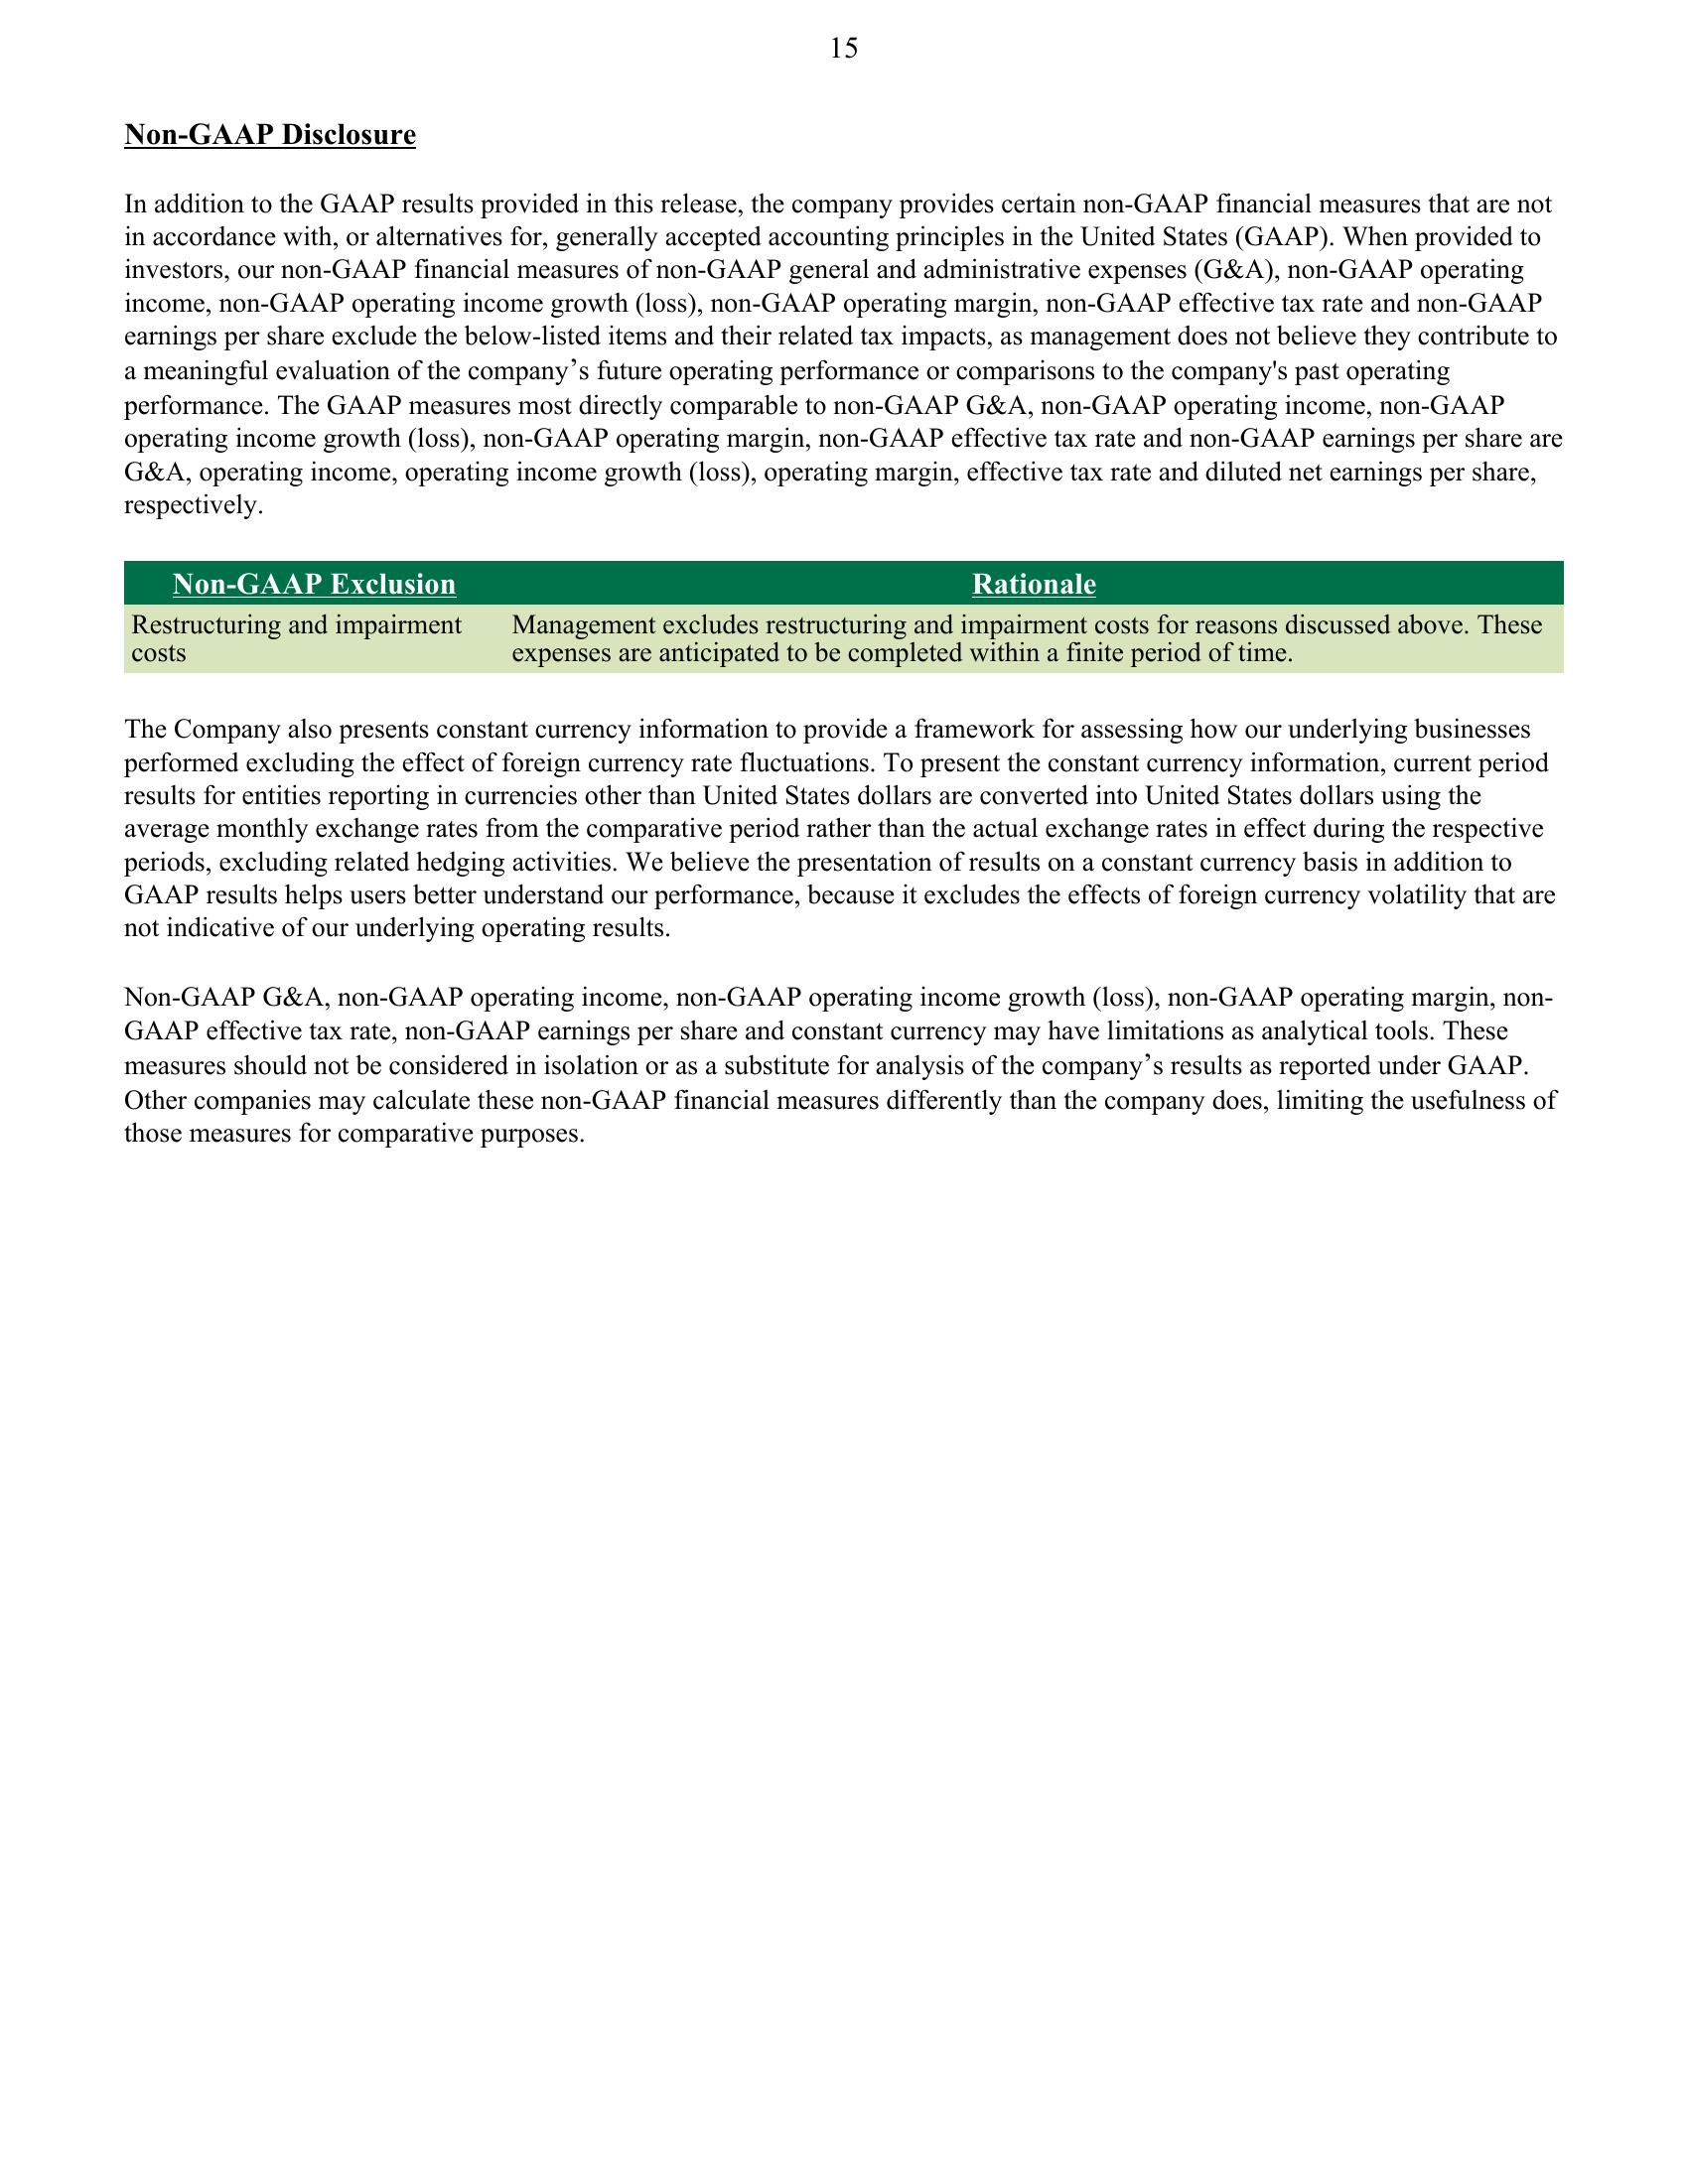
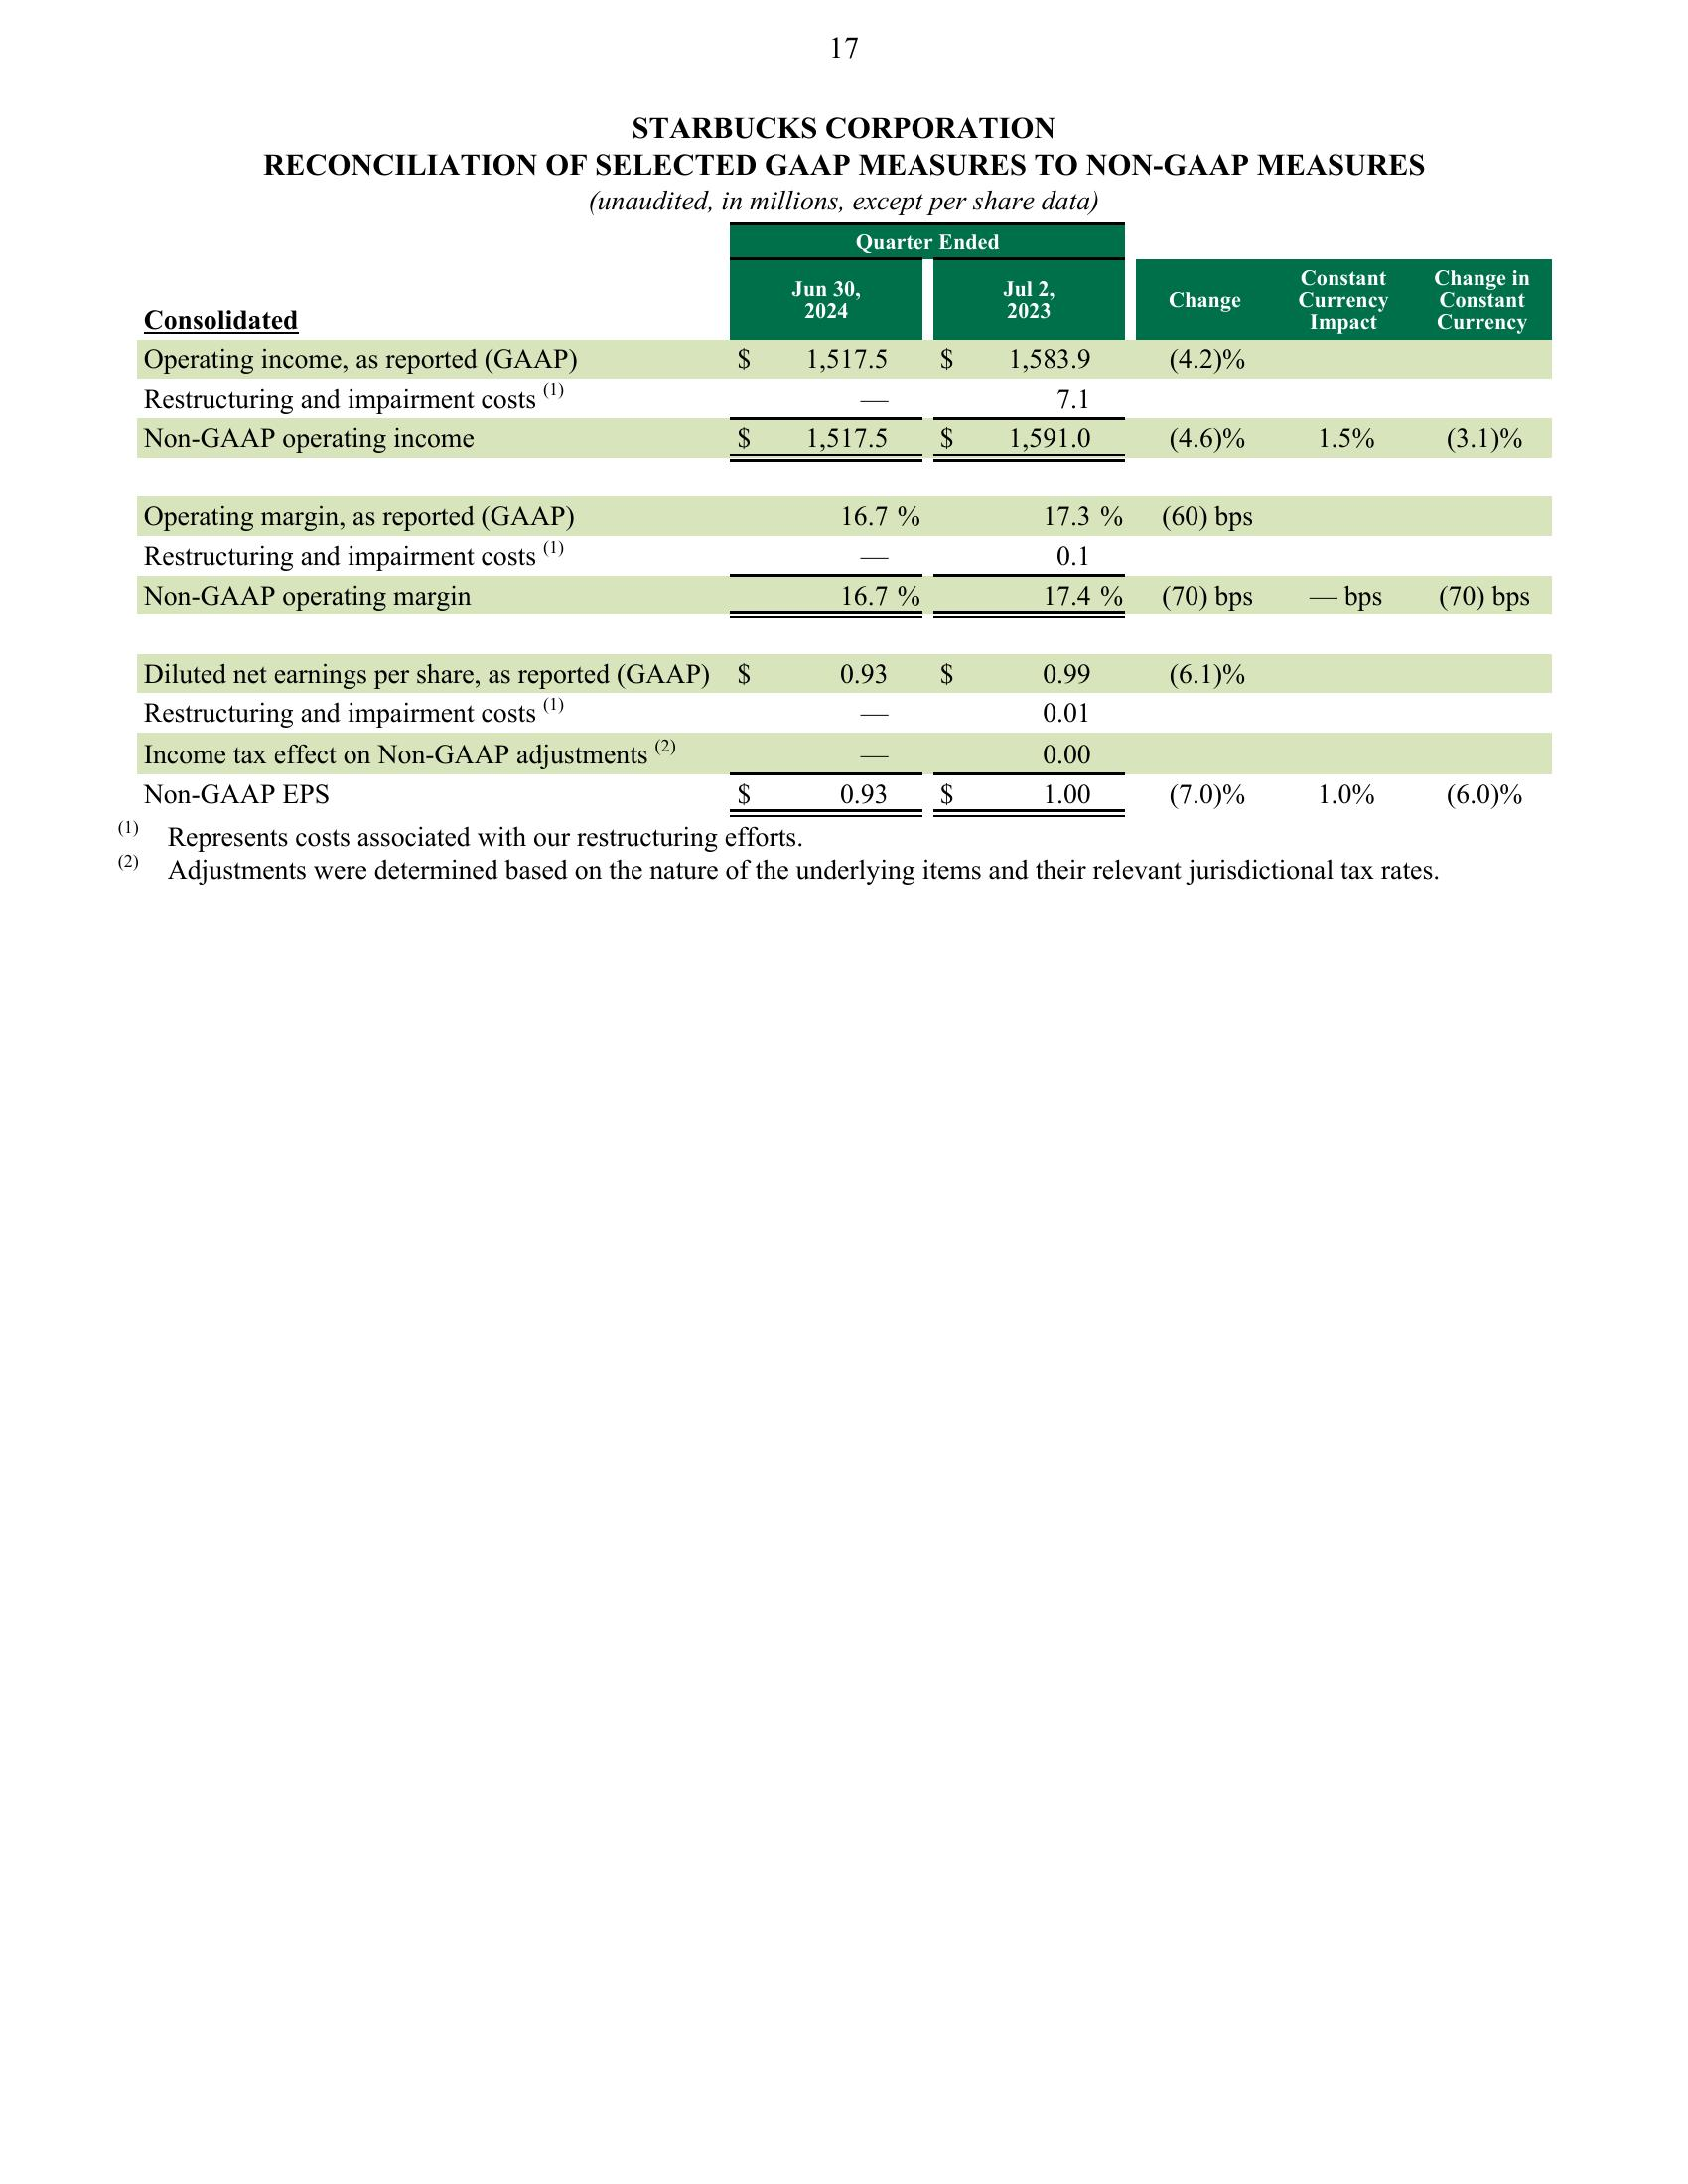
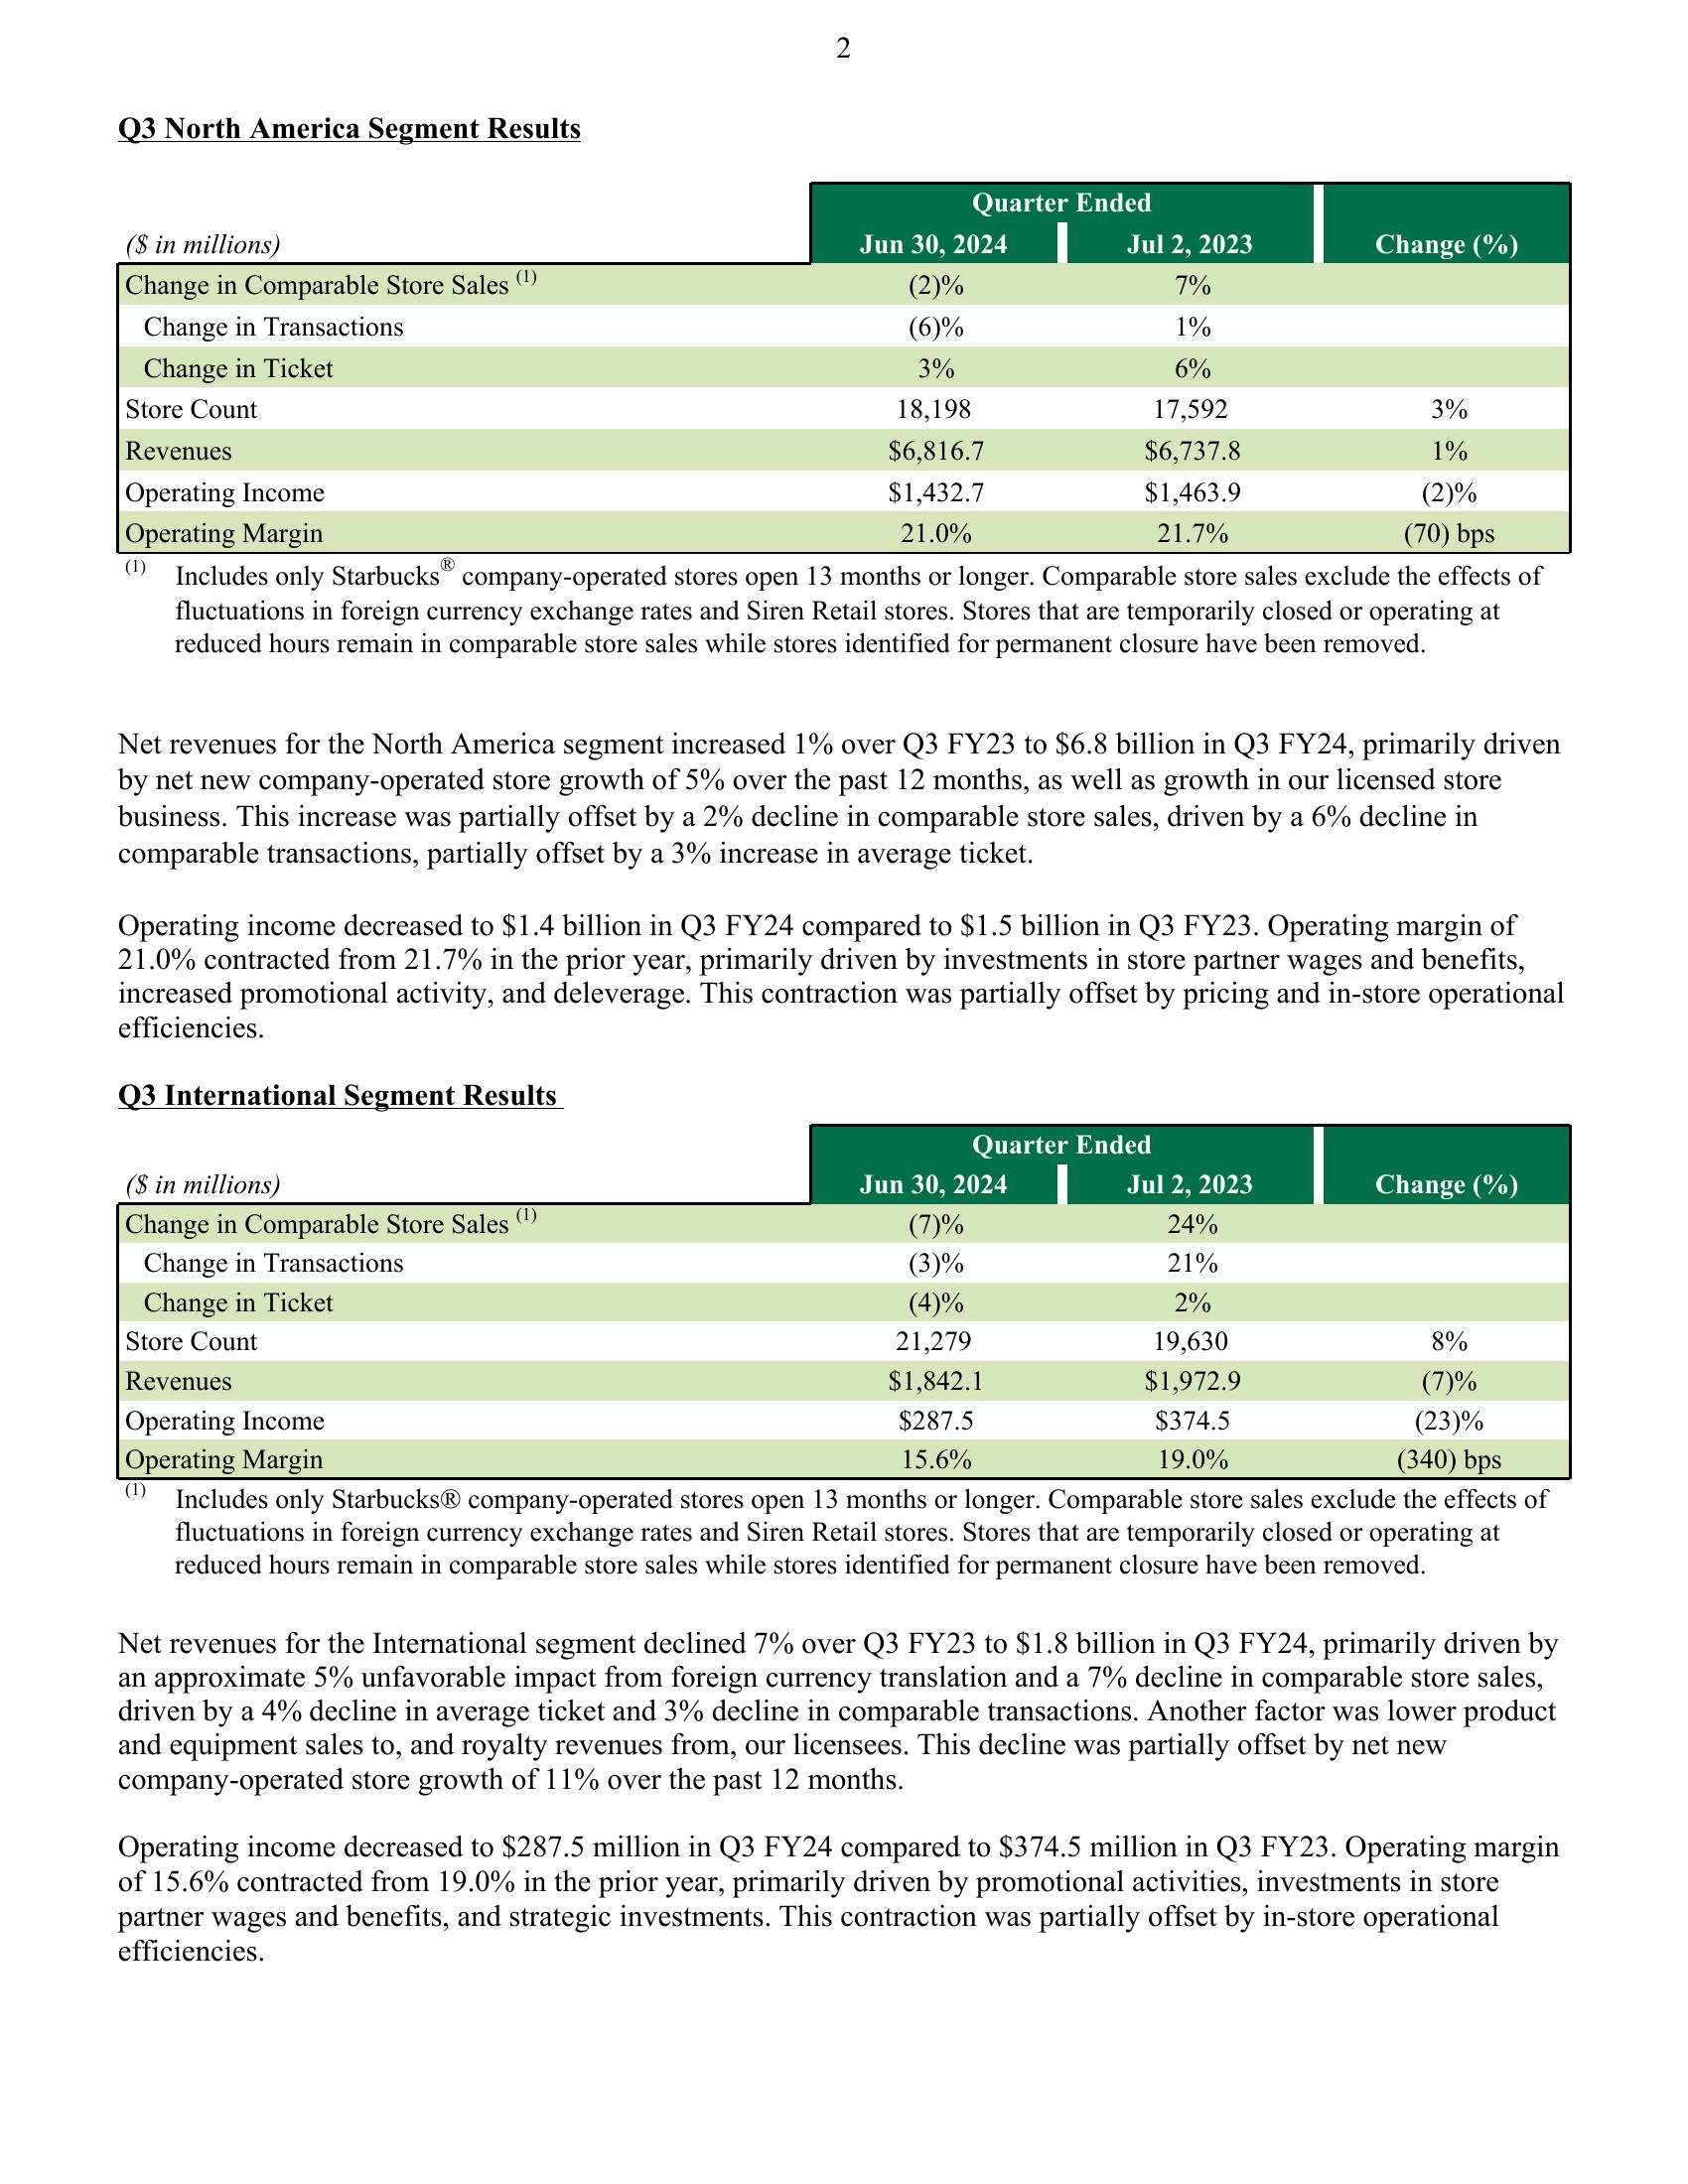
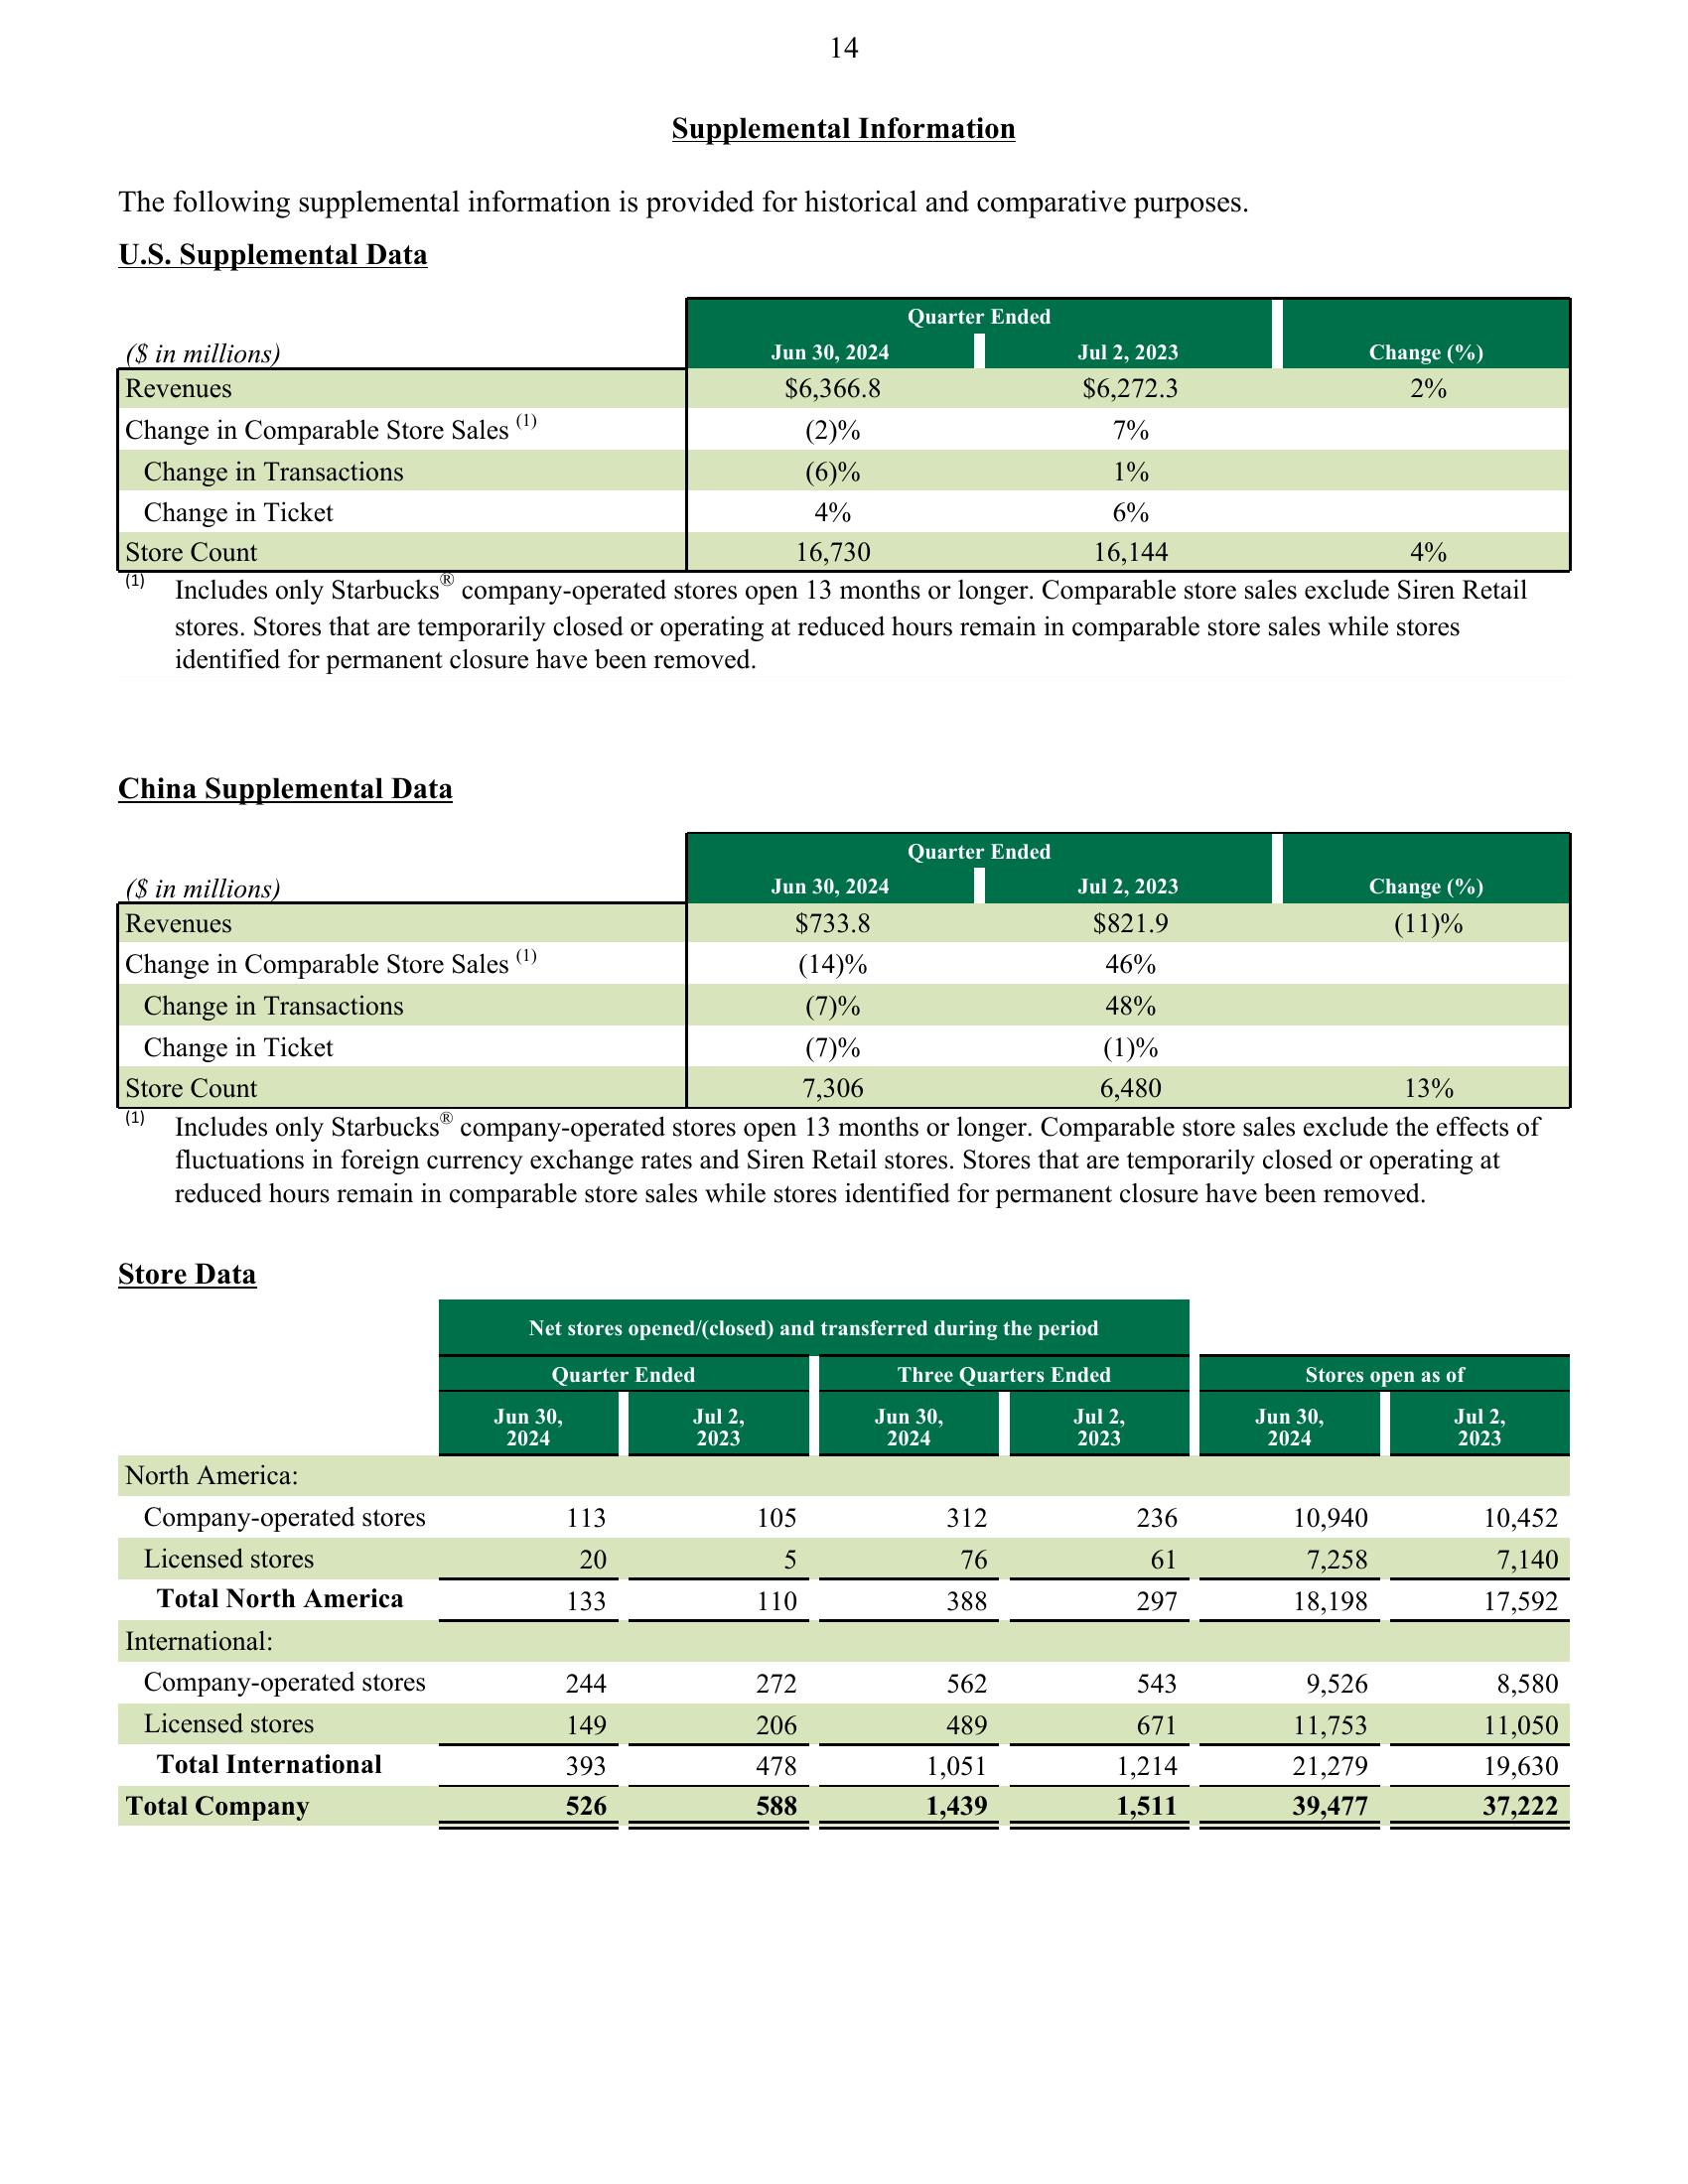
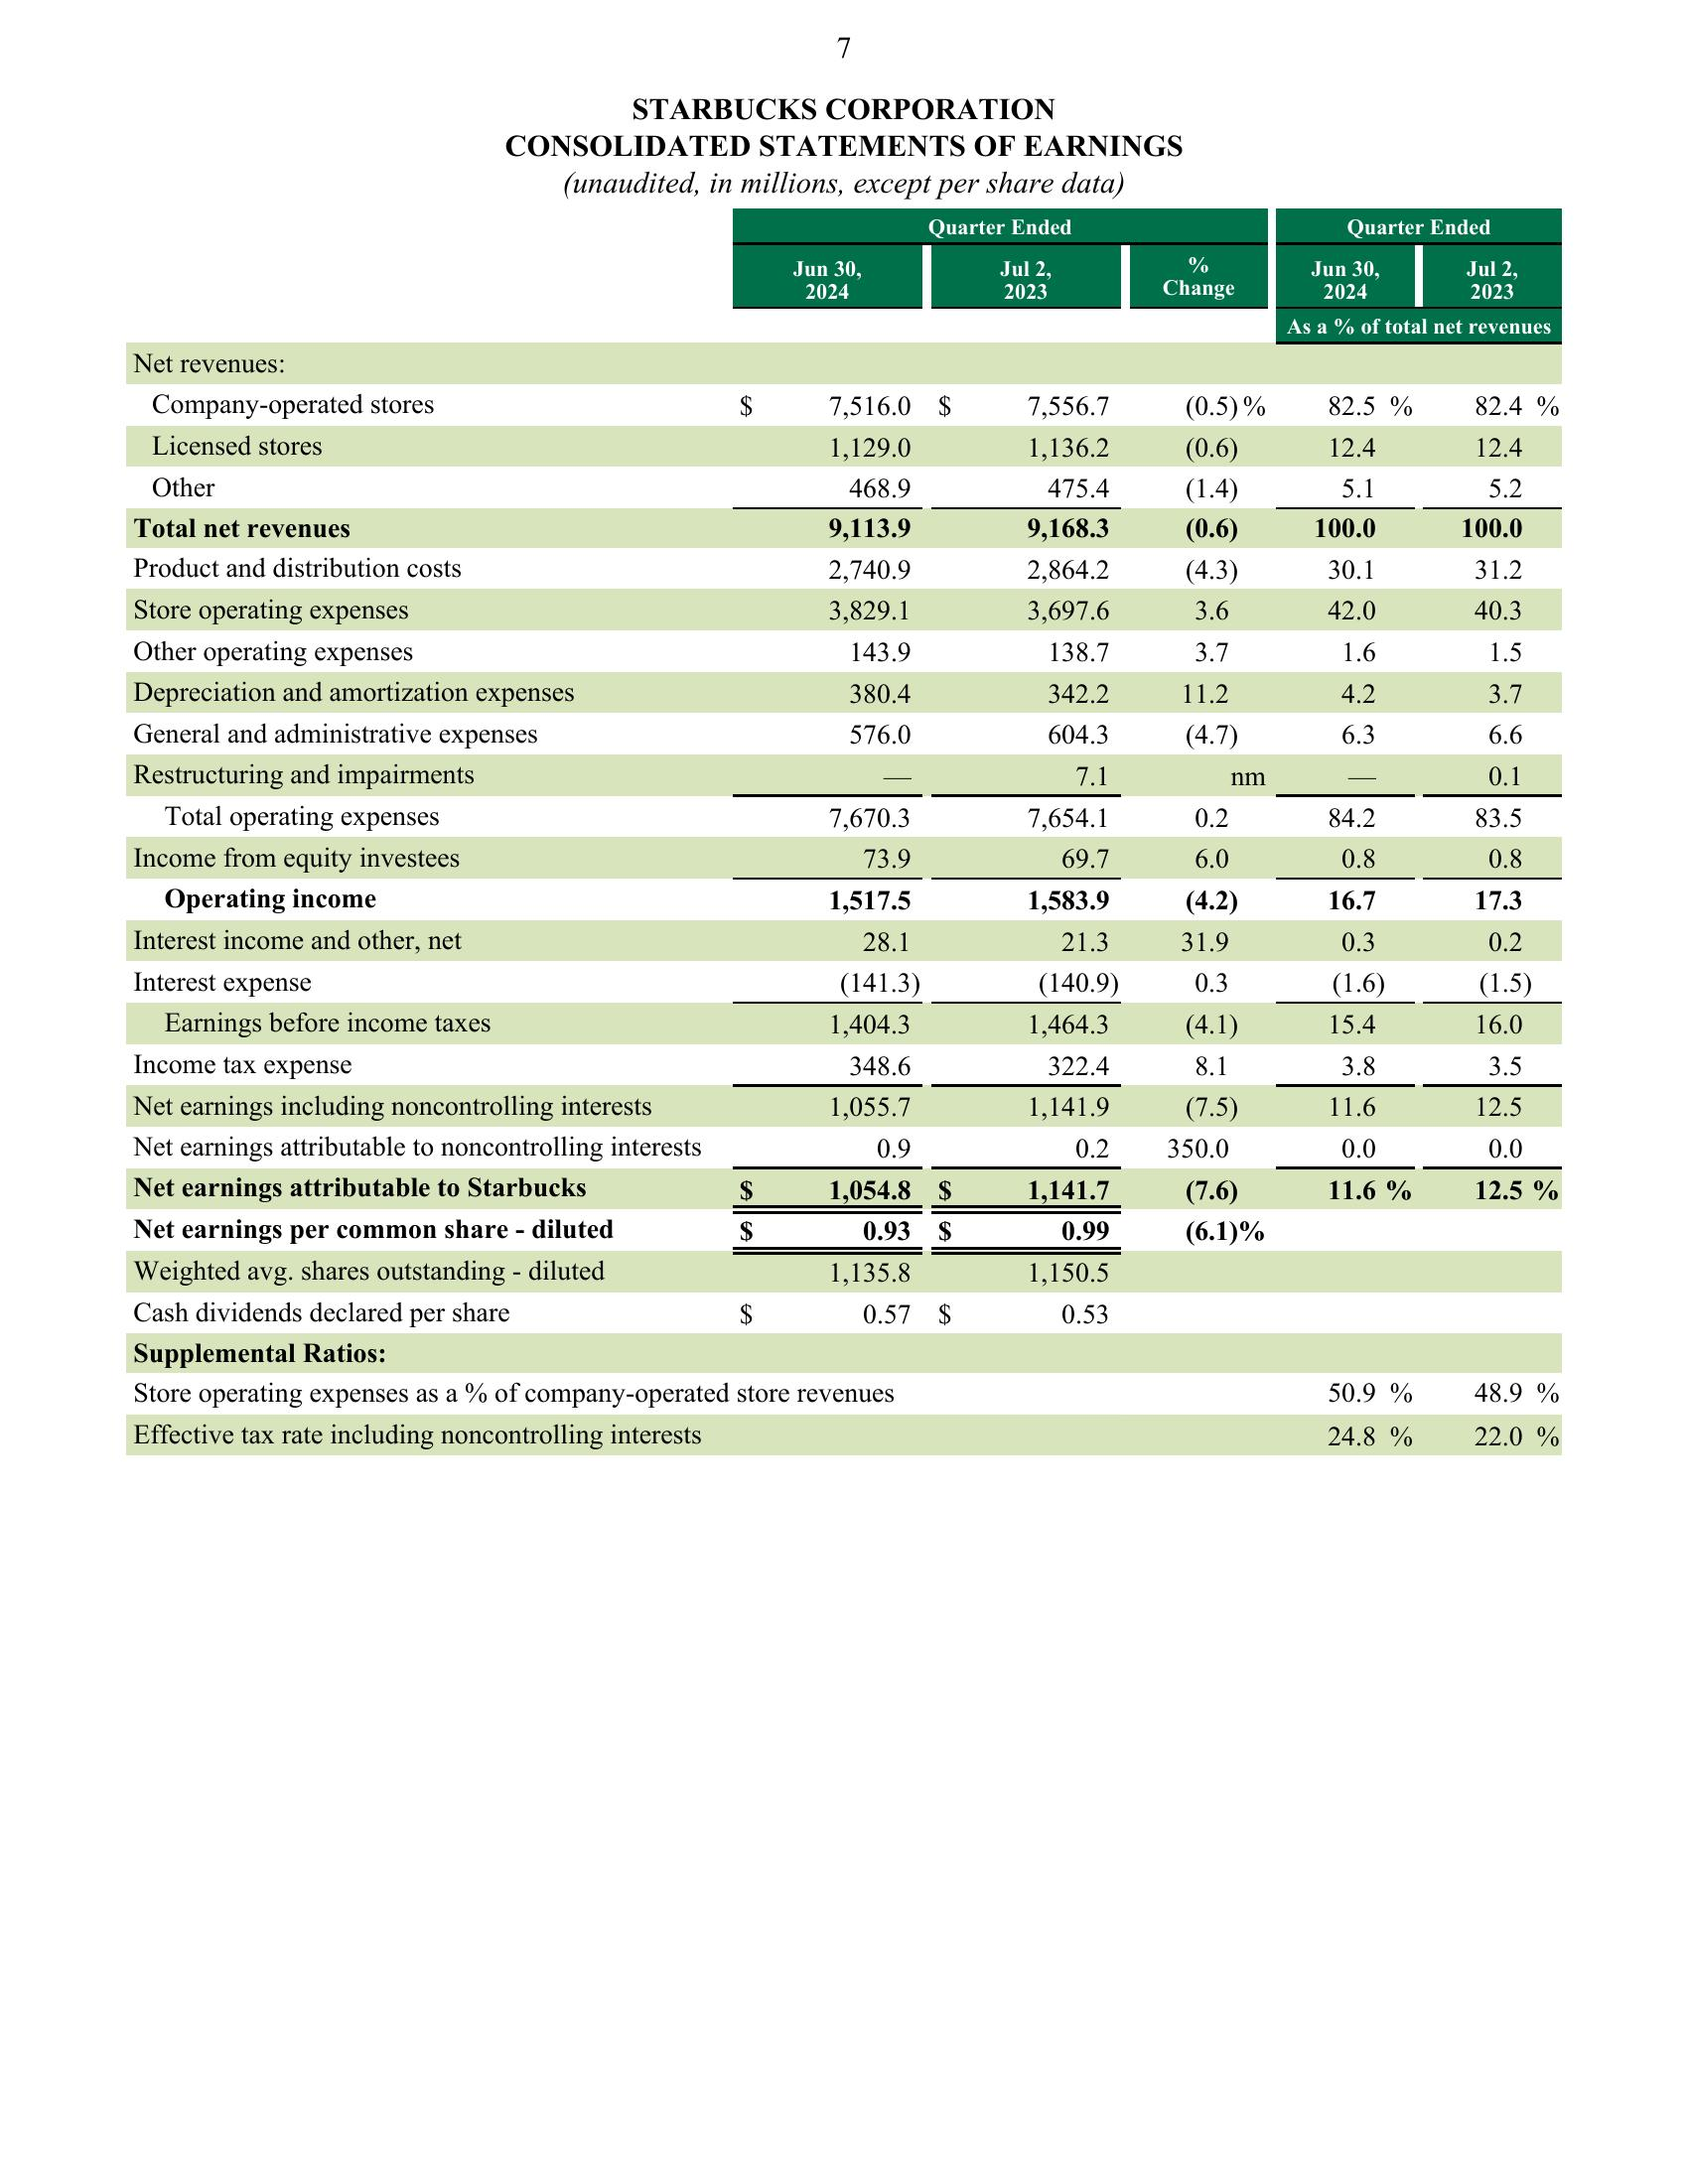

In [48]:
# PRepare the list of images
image_data_list = [{"type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{img}",
                                  "detail": "high"}} for img in base64frame]
image_data_list

In [49]:
# Prepare the message content
user_message_content = [
    {"type": "text", "text": text_context},
    *image_data_list
]

In [50]:
# Generate the answer
response = client.chat.completions.create(
    model = "gpt-4o-mini",
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_message_content}],
    temperature = 0.2)

In [51]:
# Display the generated answer
display(Markdown(response.choices[0].message.content))

Based on the provided data, here are the short-term risks for Starbucks Corporation:

1. **International Weakness**: The company is experiencing challenges in several international markets, particularly in the Middle East, Southeast Asia, parts of Europe, and notably China. These regions are facing headwinds due to brand misperceptions and economic pressures, which could impact sales and profitability.

2. **Declining Comparable Store Sales**: The North America segment reported a 2% decline in comparable store sales, and the international segment saw a 7% decline. This trend could indicate weakening consumer demand and may affect overall revenue growth.

3. **Increased Operating Costs**: Operating income decreased in both North America and international segments, primarily due to increased promotional activities, investments in store partner wages, and benefits. Rising costs without corresponding revenue growth can squeeze margins.

4. **Currency Fluctuations**: The company is exposed to foreign currency exchange risks, which can impact revenues and profitability, especially in international markets. The unfavorable impact from currency translation was noted in the international segment.

5. **Market Saturation and Competition**: In mature markets like the U.S. and parts of Europe, competition is intensifying, which may lead to price wars or increased marketing expenses to maintain market share.

6. **Consumer Spending Pressures**: Economic conditions in various regions, particularly in Europe where consumers are reportedly stretched, could lead to reduced discretionary spending on premium products like coffee.

7. **Operational Efficiency Initiatives**: While the company is targeting efficiency improvements, the success of these initiatives is uncertain in the short term. If they do not yield expected results quickly, it could impact financial performance.

These risks could affect Starbucks' ability to achieve its financial targets in the near term, particularly as it navigates a challenging global landscape.